<a href="https://colab.research.google.com/github/bogatovam/cv-hse/blob/main/CV_HW2_20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
!curl https://raw.githubusercontent.com/bogatovam/cv-hse/main/image.jpg > image.jpg
image_name = 'image.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90202  100 90202    0     0   595k      0 --:--:-- --:--:-- --:--:--  595k


1. Чтение изображения из файла

In [3]:
source = cv2.imread(image_name)
img = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

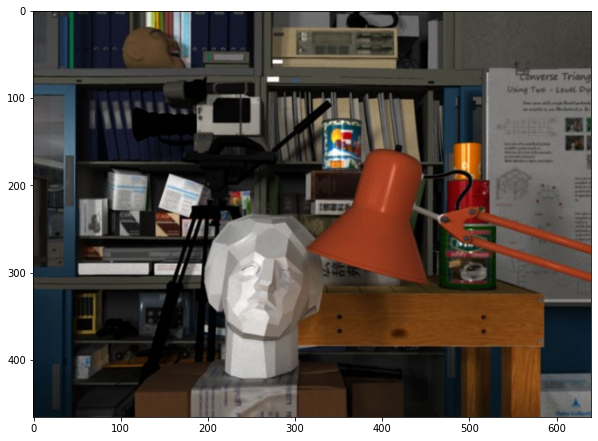

In [4]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
pass

2. Преобразование в YUV

In [5]:
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

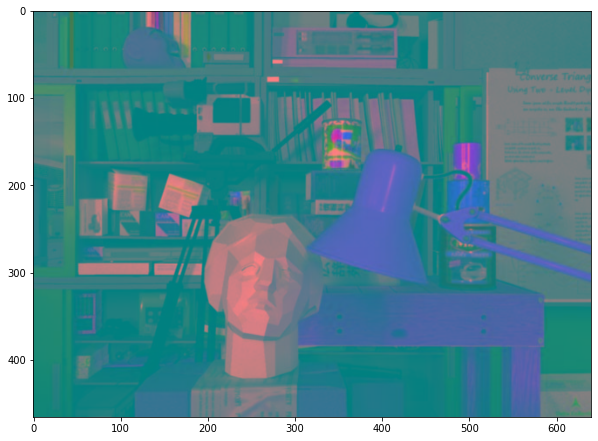

In [6]:
plt.figure(figsize = (10, 10))
plt.imshow(yuv)
pass

In [7]:
y, u, v = cv2.split(yuv)

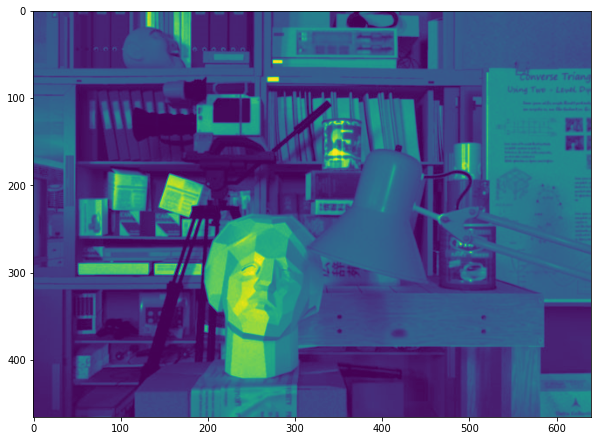

In [8]:
plt.figure(figsize = (10, 10))
plt.imshow(y)
pass

3. Улучшение контраста для y канала

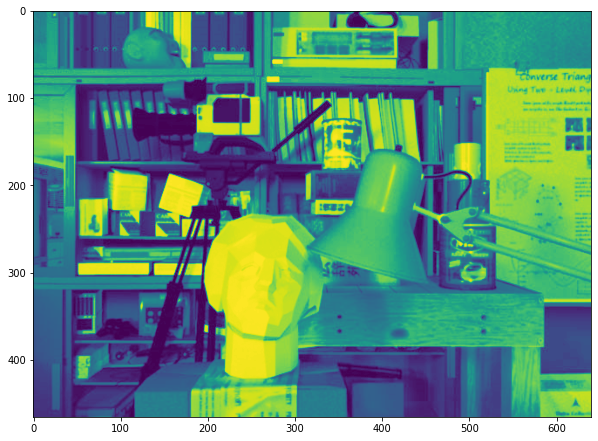

In [9]:
y = cv2.equalizeHist(y)
plt.figure(figsize = (10, 10))
plt.imshow(y)
pass

4. Нахождение краев объектов

In [10]:
canny = cv2.Canny(y,150,250)

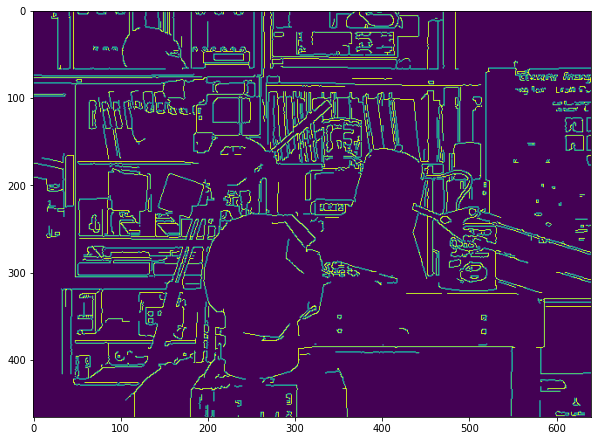

In [11]:
plt.figure(figsize = (10, 10))
plt.imshow(canny)
pass

5. Нахождение угловых точек и объединение их с краями

In [12]:
canny_with_corners = canny

blockSize = 2
apertureSize = 3
k = 0.04
thresh = 105

corners = cv2.cornerHarris(y, blockSize, apertureSize, k)

corners_norm = np.empty(corners.shape, dtype=np.float32)
cv2.normalize(corners, corners_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

for i in range(corners_norm.shape[0]):
   for j in range(corners_norm.shape[1]):
      if int(corners_norm[i,j]) > thresh:
         cv2.circle(canny_with_corners, (j,i), 2, (255), 2)

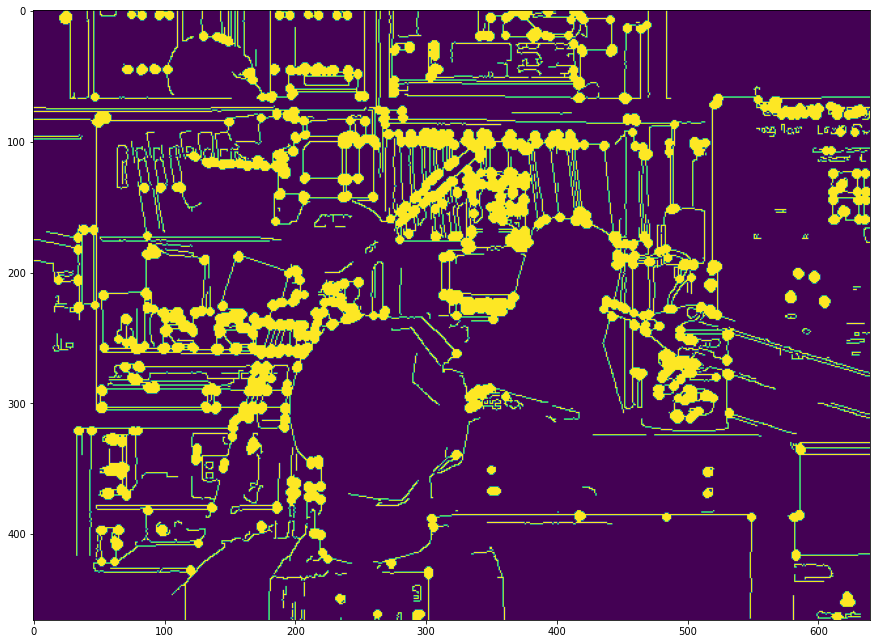

In [13]:
plt.figure(figsize = (15, 15))
plt.imshow(canny_with_corners)
pass

6. Построение карты растояний. Для корректности дальнейших шагов, изображение с краями должно быть инвертировано

In [14]:
d = cv2.distanceTransform(cv2.bitwise_not(canny_with_corners), cv2.DIST_L2, 3)

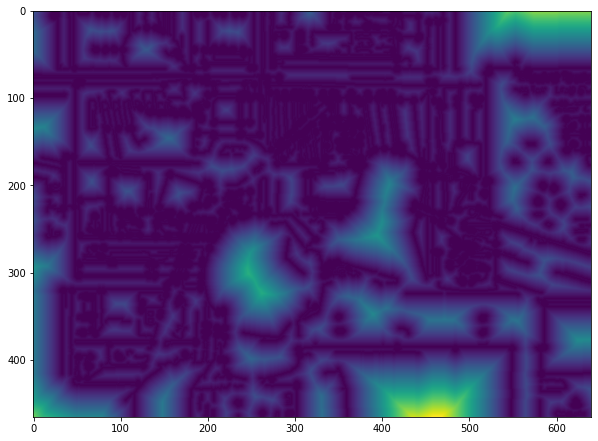

In [15]:
plt.figure(figsize = (10, 10))
plt.imshow(d)
pass

7-8. Фильтрация усреднением

In [16]:
def get_mean_filter(integral_image, i, j, filter_size):        
  padding = int(filter_size/2)
  A = (max(0, i - padding), max(0, j - padding))
  B = (max(0, i - padding), min(integral_image.shape[1] - 1, j + padding))
  C = (min(integral_image.shape[0] - 1, i + padding),  min(integral_image.shape[1] - 1, j + padding))
  D = (min(integral_image.shape[0] - 1, i + padding), max(0, j - padding))

  sum = integral_image[A[0], A[1]] + integral_image[C[0], C[1]] - integral_image[B[0], B[1]] - integral_image[D[0], D[1]]
  return sum / (padding * 2 + 1) ** 2

In [17]:
def filter_with_edges(y_channel, d, k):
  integral_y = cv2.integral(y_channel)[1:,1:]
  new_y = np.zeros(y_channel.shape).astype('uint8')
  for i in range(y_channel.shape[0]):
    for j in range(y_channel.shape[1]):
      filter_size = int(k * d[i][j])
      if filter_size == 0:
        new_y[i][j] = y_channel[i][j]
      else:
        new_y[i][j] = get_mean_filter(integral_y, i, j, filter_size)
  return new_y

9. Вывод BGR изображения (k = 1)

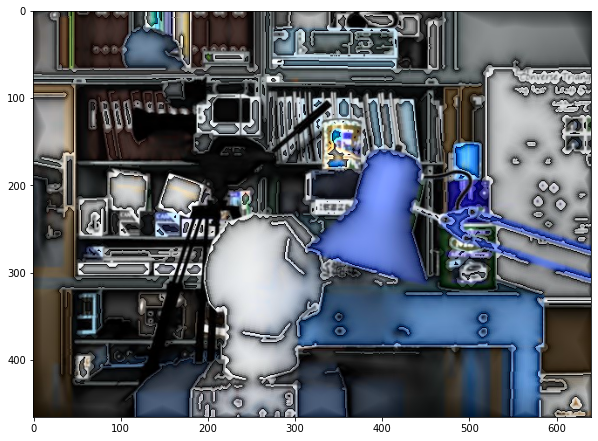

In [18]:
new_y = filter_with_edges(y, d, 1)
res = cv2.merge((new_y, u, v))
res = cv2.cvtColor(res, cv2.COLOR_YUV2BGR)

plt.figure(figsize = (10, 10))
plt.imshow(res)
pass

**k = 4**


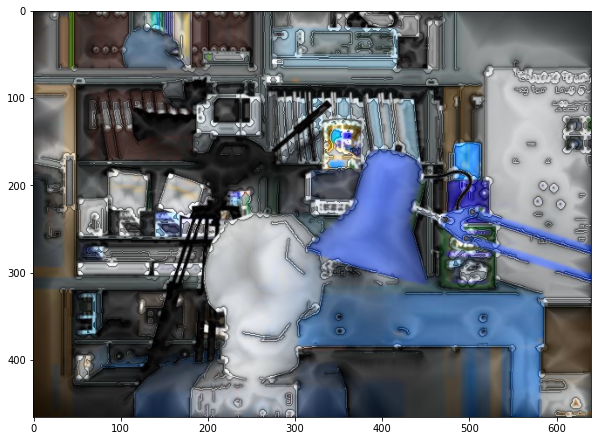

In [19]:
new_y = filter_with_edges(y, d, 4)
res = cv2.merge((new_y, u, v))
res = cv2.cvtColor(res, cv2.COLOR_YUV2BGR)

plt.figure(figsize = (10, 10))
plt.imshow(res)
pass

**k = 10**

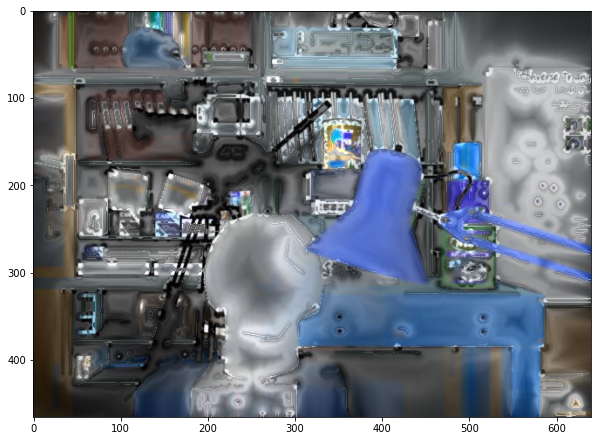

In [20]:
new_y = filter_with_edges(y, d, 10)
res = cv2.merge((new_y, u, v))
res = cv2.cvtColor(res, cv2.COLOR_YUV2BGR)

plt.figure(figsize = (10, 10))
plt.imshow(res)
pass